In [33]:
%run -i '../header.py'

In [2]:
def asympRead(particle, cutoff, cfgname, prefix): 
    return pd.concat([pd.read_csv("output/{}.{}/data/{}/asymp-{:g}.dat".format(prefix, cfgname, particle, cutscale), header=None, names=["E", str(cutscale)], index_col=0)\
                      for cutscale in cutoff], axis=1)\
          ,pd.read_csv("output/{}.{}/data/{}/minE.dat".format(prefix, cfgname, particle), header=None, names=["cutscale", "E"], index_col=0)

In [3]:
def plotParticle(ax, pname, cfgname, prefix, window=[-np.inf, np.inf]):
    config = json.load(open("output/"+prefix+"."+cfgname+"/config"), object_pairs_hook = OrderedDict)
    data, peaks = asympRead(pname, config[pname]["cutscales"], cfgname, prefix)
    plotData = data.loc[(data.index > window[0]) & (data.index < window[1])].plot(marker="o", ls="", logy=True, ax=ax)
    ax.set_xlabel("M, [$GeV$]")
    ax.set_ylabel(r'$C_+, [GeV^{\frac{1}{2}}]$')
    ax.set_title("${}$({:.3f})".format(code2name(pname), 2*config[pname]["eq"]["env"]["mC"]+peaks.iloc[-1][0]))
    ticks = ax.get_xticks()
    ticks = ["{:.3f}".format(2*config[pname]["eq"]["env"]["mC"]+t) for t in ticks]
    ax.set_xticklabels(ticks)
    for line in ax.get_lines():
        color = line._get_markerfacecolor()
        pos = line.get_label()
        plotData.axvline(peaks.loc[float(pos)][0], ls="--", color=color)

In [27]:
def doPlots(cfgname, prefix, window=None):
    config = json.load(open("output/" + prefix+"."+cfgname+"/config"), object_pairs_hook=OrderedDict)
    fig, axes = plt.subplots(len(config), figsize=(plt.rcParams["figure.figsize"][0], (plt.rcParams["figure.figsize"][1]+1.5)*len(config)))
    for i,pname in enumerate(config.keys()):
        plotParticle(axes[i], pname, cfgname, prefix, [-np.inf, np.inf] if window is None else config[pname]["eq"]["E"] + np.array([-window, window]))


In [5]:
def printCheck(pname, cfgname, prefix):
    peaks = pd.read_csv("output/{}.{}/data/{}/minE.dat".format(prefix, cfgname, pname), header=None, names=["cutscale", "E"], index_col=0)
    config = json.load(open("output/" + prefix+"."+cfgname+"/config"), object_pairs_hook=OrderedDict)
    res = pd.DataFrame(peaks["E"].values - peaks["E"].iloc[-1], index=pd.Index(config[pname]["cutscales"], name="Cutscale [$GeV^{-1}$]"), columns=["Deviation from the highest cutoff [$GeV$]"])
    return res

In [6]:
def printChecks(cfgname, prefix):
    config = json.load(open("output/"+prefix+"."+cfgname+"/config"), object_pairs_hook=OrderedDict)
    for pname in config.keys():
        display(printCheck(pname, cfgname, prefix))

In [7]:
def readMine(cfgname, prefix):
    config = json.load(open("output/"+prefix+"."+cfgname+"/config"), object_pairs_hook=OrderedDict)
    my = dict()
    for pname in config.keys():
        peaks = pd.read_csv("output/{}.{}/data/{}/minE.dat".format(prefix, cfgname, pname), header=None, names=["cutscale", "E"], index_col=0)
        my.update({pname: np.array([1000*(2*config[pname]["eq"]["env"]["mC"]+peaks.iloc[-1][0])])})
    my = pd.DataFrame.from_dict(my, orient="index")
    my.columns = ["my("+prefix+")"]
    return my

# Charmonium

## Linear

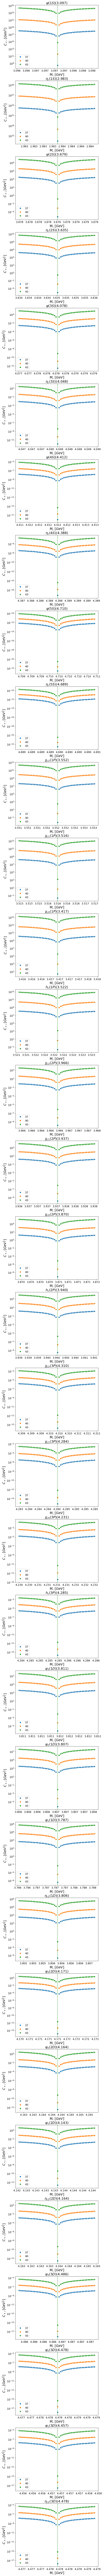

In [34]:
doPlots("c-lin", "lin")

In [35]:
printChecks("c-lin", "lin")

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                       4.8e-13
40                                                       4.8e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                     -4.77e-13
40                                                     -4.77e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                      -2.4e-13
40                                                      -2.4e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                             0
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                     -9.99e-14
40                                                     -9.99e-14
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                         3e-13
40                                                         3e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                             0
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                        -2e-13
40                                                        -2e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                             0
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                             0
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                       2.4e-13
40                                                       2.4e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                      -1.8e-13
40                                                      -1.8e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                       1.8e-13
40                                                       1.8e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                      6.01e-14
40                                                      6.01e-14
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                         2e-13
40                                                         2e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                      6.01e-14
40                                                      6.01e-14
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                             0
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                       2.4e-13
40                                                       2.4e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                             0
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                        -3e-13
40                                                        -3e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                         2e-13
40                                                         2e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                             0
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                      -2.4e-13
40                                                      -2.4e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                       2.4e-13
40                                                       2.4e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                             0
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                             0
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                             0
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                        -4e-13
40                                                        -4e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                      9.97e-14
40                                                      9.97e-14
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                         2e-13
40                                                         2e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                             0
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                             0
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                     -9.97e-14
40                                                     -9.97e-14
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                     -9.97e-14
40                                                     -9.97e-14
43                                                             0

In [36]:
article = pd.read_csv("../data/c-spectrum.csv", index_col=0, comment="#")
res = article.join(readMine("c-lin", "lin"))

In [38]:
compiled = res.join(\
    res["LP"].subtract(res["my(lin)"], axis=0).abs().rename("dev(lin)")\
).join(\
    res.subtract(res["my(lin)"], axis=0).abs().drop(["my(lin)"], axis=1).min(axis=1).rename("alldev(lin)")\
)\
.round({"dev(lin)": 3, "alldev(lin)": 3})

compiled = compiled[["PDG", "BGS", "SNR", "LP", "my(lin)", "dev(lin)", "alldev(lin)"]]

In [39]:
compiled.sort_values("alldev(lin)")

PDG      BGS   SNR    LP  my(lin)  dev(lin)  alldev(lin)
name                                                                   
psi_2_3D       nan      nan  4327  4478 4.48e+03     0.031        0.031
psi_3S    4.04e+03 4.07e+03  4022  4078 4.08e+03      0.04         0.04
chi_c2_3P      nan 4.32e+03  4208  4310 4.31e+03      0.04         0.04
psi_1_1D  3.78e+03 3.78e+03  3787  3787 3.79e+03     0.063        0.063
psi_1S     3.1e+03 3.09e+03  3097  3097  3.1e+03     0.084        0.084
h_c_1P    3.52e+03 3.52e+03  3519  3522 3.52e+03     0.095        0.095
chi_c2_1P 3.56e+03 3.56e+03  3554  3552 3.55e+03     0.203        0.203
eta_c_4S       nan 4.38e+03  4250  4388 4.39e+03     0.217        0.217
h_c_2P         nan 3.93e+03  3908  3940 3.94e+03     0.217        0.217
h_c_3P         nan 4.28e+03  4184  4285 4.29e+03     0.229        0.229
chi_c1_1P 3.51e+03 3.50e+03  3510  3516 3.52e+03     0.241        0.241
psi_4S    4.42e+03 4.41e+03  4273  4412 4.41e+03     0.253        0.253
chi_c1_3P      nan 4.27e+03  4178  4284 4.28e+03     0.268        0.268
chi_c1_2P      nan 3.92e+03  3901  3937 3.94e+03     0.284        0.284
eta_c2_2D      nan 4.16e+03  4099  4164 4.16e+03      0.29         0.29
eta_c2_3D      nan      nan  4326  4478 4.48e+03     0.299        0.299
eta_c_3S       nan 4.04e+03  3991  4048 4.05e+03     0.302        0.302
eta_c2_1D      nan  3.8e+03  3796  3806 3.81e+03     0.341        0.341
eta_c_1S  2.98e+03 2.98e+03  2979  2983 2.98e+03      0.38         0.38
psi_3_3D       nan      nan  4331  4486 4.49e+03     0.381        0.381
psi_3_1D       nan 3.81e+03  3799  3811 3.81e+03     0.435        0.435
psi_2_1D  3.82e+03  3.8e+03  3798  3807 3.81e+03     0.454        0.454
eta_c_2S  3.64e+03 3.63e+03  3623  3635 3.63e+03     0.472        0.472
psi_2S    3.69e+03 3.67e+03  3673  3679 3.68e+03      0.49         0.49
eta_c_5S       nan      nan  4446  4690 4.69e+03     0.552        0.552
chi_c2_2P 3.93e+03 3.97e+03  3937  3967 3.97e+03     0.554        0.554
psi_1_2D  4.19e+03 4.14e+03  4089  4144 4.14e+03      0.67         0.67
psi_1_3D       nan      nan  4317  4456 4.46e+03     0.671        0.671
psi_3_2D       nan 4.17e+03  4103  4172 4.17e+03      0.75         0.75
psi_2_2D       nan 4.16e+03  4100  4165 4.16e+03     0.845        0.845
chi_c0_3P      nan  4.2e+03  4131  4230 4.23e+03      1.02         1.02
psi_5S         nan      nan  4463  4711 4.71e+03      1.29         1.29
chi_c0_2P 3.92e+03 3.85e+03  3842  3869 3.87e+03      1.47         1.47
chi_c0_1P 3.42e+03 3.42e+03  3433  3415 3.42e+03      1.69         1.69

## Screening

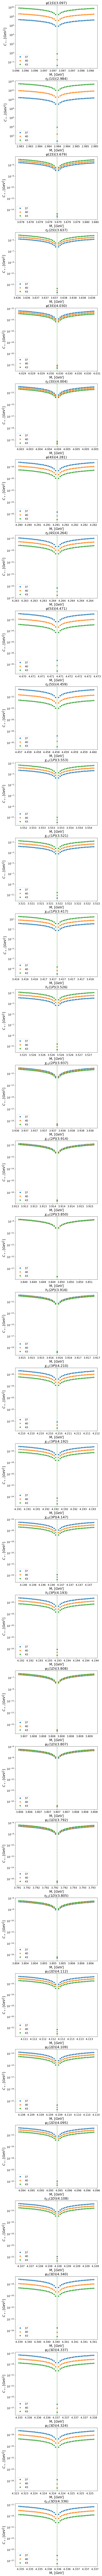

In [40]:
doPlots("c-scr", "scr")

In [41]:
printChecks("c-scr", "scr")

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                             0
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                      -2.4e-13
40                                                      -2.4e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                       2.3e-13
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                      -1.8e-13
40                                                     -5.98e-14
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                         3e-13
40                                                      9.99e-14
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                             0
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                       1.8e-12
40                                                       1.9e-12
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                        -9e-13
40                                                        -9e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                      -4.8e-12
40                                                      -3.9e-12
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                       7.7e-12
40                                                       7.7e-12
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                      -1.2e-13
40                                                      -1.2e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                      -1.2e-13
40                                                      -1.2e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                             0
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                       1.8e-13
40                                                       1.8e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                             0
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                             0
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                             0
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                      9.99e-14
40                                                      9.99e-14
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                         7e-13
40                                                         1e-12
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                         1e-12
40                                                         1e-12
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                         3e-13
40                                                         4e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                        -4e-13
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                             0
40                                                      -1.2e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                             0
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                      -1.2e-13
40                                                      -1.2e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                      -1.2e-13
40                                                      -1.2e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                         3e-13
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                        -5e-13
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                         2e-13
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                         2e-13
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                        -3e-12
40                                                      -2.9e-12
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                         9e-13
40                                                         4e-13
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                         5e-13
40                                                             0
43                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                       1.4e-12
40                                                       1.9e-12
43                                                             0

In [44]:
article = pd.read_csv("../data/c-spectrum.csv", index_col=0, comment="#")
res = article.join(readMine("c-scr", "scr"))

In [46]:
compiled = res.join(\
    res["SP"].subtract(res["my(scr)"], axis=0).abs().rename("dev(scr)")\
).join(\
    res.subtract(res["my(scr)"], axis=0).abs().drop(["my(scr)"], axis=1).min(axis=1).rename("alldev(scr)")\
)\
.round({"dev(scr)": 3, "alldev(scr)": 3})

compiled = compiled[["PDG", "BGS", "SNR", "SP", "my(scr)", "dev(scr)", "alldev(scr)"]]

In [47]:
compiled

PDG      BGS   SNR    SP  my(scr)  dev(scr)  alldev(scr)
name                                                                   
psi_1S     3.1e+03 3.09e+03  3097  3097  3.1e+03     0.143        0.143
eta_c_1S  2.98e+03 2.98e+03  2979  2984 2.98e+03     0.012        0.012
psi_2S    3.69e+03 3.67e+03  3673  3679 3.68e+03     0.025        0.025
eta_c_2S  3.64e+03 3.63e+03  3623  3637 3.64e+03     0.321        0.321
psi_3S    4.04e+03 4.07e+03  4022  4030 4.03e+03     0.319        0.319
eta_c_3S       nan 4.04e+03  3991  4004    4e+03     0.234        0.234
psi_4S    4.42e+03 4.41e+03  4273  4281 4.28e+03     0.274        0.274
eta_c_4S       nan 4.38e+03  4250  4264 4.26e+03     0.382        0.382
psi_5S         nan      nan  4463  4472 4.47e+03     0.577        0.577
eta_c_5S       nan      nan  4446  4459 4.46e+03      0.47         0.47
chi_c2_1P 3.56e+03 3.56e+03  3554  3553 3.55e+03     0.151        0.151
chi_c1_1P 3.51e+03 3.50e+03  3510  3521 3.52e+03     0.444        0.444
chi_c0_1P 3.42e+03 3.42e+03  3433  3415 3.42e+03      1.86         1.86
h_c_1P    3.52e+03 3.52e+03  3519  3526 3.53e+03     0.158        0.158
chi_c2_2P 3.93e+03 3.97e+03  3937  3937 3.94e+03     0.364        0.364
chi_c1_2P      nan 3.92e+03  3901  3914 3.91e+03     0.127        0.127
chi_c0_2P 3.92e+03 3.85e+03  3842  3848 3.85e+03      1.64         1.64
h_c_2P         nan 3.93e+03  3908  3916 3.92e+03      0.06         0.06
chi_c2_3P      nan 4.32e+03  4208  4211 4.21e+03     0.549        0.549
chi_c1_3P      nan 4.27e+03  4178  4192 4.19e+03     0.051        0.051
chi_c0_3P      nan  4.2e+03  4131  4146 4.15e+03     0.654        0.654
h_c_3P         nan 4.28e+03  4184  4193 4.19e+03     0.228        0.228
psi_3_1D       nan 3.81e+03  3799  3808 3.81e+03      0.14         0.14
psi_2_1D  3.82e+03  3.8e+03  3798  3807 3.81e+03     0.004        0.004
psi_1_1D  3.78e+03 3.78e+03  3787  3792 3.79e+03      0.31         0.31
eta_c2_1D      nan  3.8e+03  3796  3805 3.81e+03      0.11         0.11
psi_3_2D       nan 4.17e+03  4103  4112 4.11e+03     0.382        0.382
psi_2_2D       nan 4.16e+03  4100  4109 4.11e+03     0.202        0.202
psi_1_2D  4.19e+03 4.14e+03  4089  4095  4.1e+03     0.194        0.194
eta_c2_2D      nan 4.16e+03  4099  4108 4.11e+03     0.222        0.222
psi_3_3D       nan      nan  4331  4340 4.34e+03     0.273        0.273
psi_2_3D       nan      nan  4327  4337 4.34e+03     0.478        0.478
psi_1_3D       nan      nan  4317  4324 4.32e+03      0.12         0.12
eta_c2_3D      nan      nan  4326  4336 4.34e+03     0.015        0.015

# Compiled charmonia

In [49]:
article = pd.read_csv("../data/c-spectrum.csv", index_col=0, comment="#")
res = article.join(readMine("c-lin", "lin")).join(readMine("c-scr", "scr"))

In [50]:
compiled = res.join(\
    res["LP"].subtract(res["my(lin)"], axis=0).abs().rename("dev(lin)")\
).join(\
    res.subtract(res["my(lin)"], axis=0).abs().drop(["my(lin)"], axis=1).min(axis=1).rename("alldev(lin)")\
).join(\
    res["SP"].subtract(res["my(scr)"], axis=0).abs().rename("dev(scr)")\
).join(\
    res.subtract(res["my(scr)"], axis=0).abs().drop(["my(scr)"], axis=1).min(axis=1).rename("alldev(scr)")\
)\
.round({"dev(scr)": 3, "alldev(scr)": 3, "alldev(lin)": 3, "dev(lin)": 3})

compiled = compiled.join(\
    compiled["dev(lin)"].add(compiled["dev(scr)"]).rename("dev(tot)")\
)\
.join(\
    compiled["alldev(lin)"].add(compiled["alldev(scr)"]).rename("alldev(tot)")\
)

compiled = compiled[["PDG", "BGS", "SNR", "LP", "my(lin)", "dev(lin)", "alldev(lin)", "SP", "my(scr)", "dev(scr)", "alldev(scr)", "dev(tot)", "alldev(tot)"]]

In [51]:
compiled

PDG      BGS   SNR    LP  my(lin)  dev(lin)  alldev(lin)    SP  \
name                                                                            
psi_1S     3.1e+03 3.09e+03  3097  3097  3.1e+03     0.084        0.084  3097   
eta_c_1S  2.98e+03 2.98e+03  2979  2983 2.98e+03      0.38         0.38  2984   
psi_2S    3.69e+03 3.67e+03  3673  3679 3.68e+03      0.49        0.465  3679   
eta_c_2S  3.64e+03 3.63e+03  3623  3635 3.63e+03     0.472        0.472  3637   
psi_3S    4.04e+03 4.07e+03  4022  4078 4.08e+03      0.04         0.04  4030   
eta_c_3S       nan 4.04e+03  3991  4048 4.05e+03     0.302        0.302  4004   
psi_4S    4.42e+03 4.41e+03  4273  4412 4.41e+03     0.253        0.253  4281   
eta_c_4S       nan 4.38e+03  4250  4388 4.39e+03     0.217        0.217  4264   
psi_5S         nan      nan  4463  4711 4.71e+03      1.29         1.29  4472   
eta_c_5S       nan      nan  4446  4690 4.69e+03     0.552        0.552  4459   
chi_c2_1P 3.56e+03 3.56e+03  3554  3552 3.55e+03     0.203        0.203  3553   
chi_c1_1P 3.51e+03 3.50e+03  3510  3516 3.52e+03     0.241        0.241  3521   
chi_c0_1P 3.42e+03 3.42e+03  3433  3415 3.42e+03      1.69        0.168  3415   
h_c_1P    3.52e+03 3.52e+03  3519  3522 3.52e+03     0.095        0.095  3526   
chi_c2_2P 3.93e+03 3.97e+03  3937  3967 3.97e+03     0.554        0.554  3937   
chi_c1_2P      nan 3.92e+03  3901  3937 3.94e+03     0.284        0.284  3914   
chi_c0_2P 3.92e+03 3.85e+03  3842  3869 3.87e+03      1.47         1.47  3848   
h_c_2P         nan 3.93e+03  3908  3940 3.94e+03     0.217        0.217  3916   
chi_c2_3P      nan 4.32e+03  4208  4310 4.31e+03      0.04         0.04  4211   
chi_c1_3P      nan 4.27e+03  4178  4284 4.28e+03     0.268        0.268  4192   
chi_c0_3P      nan  4.2e+03  4131  4230 4.23e+03      1.02         1.02  4146   
h_c_3P         nan 4.28e+03  4184  4285 4.29e+03     0.229        0.229  4193   
psi_3_1D       nan 3.81e+03  3799  3811 3.81e+03     0.435        0.435  3808   
psi_2_1D  3.82e+03  3.8e+03  3798  3807 3.81e+03     0.454        0.454  3807   
psi_1_1D  3.78e+03 3.78e+03  3787  3787 3.79e+03     0.063        0.063  3792   
eta_c2_1D      nan  3.8e+03  3796  3806 3.81e+03     0.341        0.341  3805   
psi_3_2D       nan 4.17e+03  4103  4172 4.17e+03      0.75         0.75  4112   
psi_2_2D       nan 4.16e+03  4100  4165 4.16e+03     0.845        0.845  4109   
psi_1_2D  4.19e+03 4.14e+03  4089  4144 4.14e+03      0.67         0.67  4095   
eta_c2_2D      nan 4.16e+03  4099  4164 4.16e+03      0.29         0.29  4108   
psi_3_3D       nan      nan  4331  4486 4.49e+03     0.381        0.381  4340   
psi_2_3D       nan      nan  4327  4478 4.48e+03     0.031        0.031  4337   
psi_1_3D       nan      nan  4317  4456 4.46e+03     0.671        0.671  4324   
eta_c2_3D      nan      nan  4326  4478 4.48e+03     0.299        0.299  4336   

           my(scr)  dev(scr)  alldev(scr)  dev(tot)  alldev(tot)  
name                                                              
psi_1S     3.1e+03     0.143        0.143     0.227        0.227  
eta_c_1S  2.98e+03     0.012        0.012     0.392        0.392  
psi_2S    3.68e+03     0.025        0.025     0.515         0.49  
eta_c_2S  3.64e+03     0.321        0.321     0.793        0.793  
psi_3S    4.03e+03     0.319        0.319     0.359        0.359  
eta_c_3S     4e+03     0.234        0.234     0.536        0.536  
psi_4S    4.28e+03     0.274        0.274     0.527        0.527  
eta_c_4S  4.26e+03     0.382        0.382     0.599        0.599  
psi_5S    4.47e+03     0.577        0.577      1.87         1.87  
eta_c_5S  4.46e+03      0.47         0.47      1.02         1.02  
chi_c2_1P 3.55e+03     0.151        0.151     0.354        0.354  
chi_c1_1P 3.52e+03     0.444        0.444     0.685        0.685  
chi_c0_1P 3.42e+03      1.86        0.168      3.55        0.336  
h_c_1P    3.53e+03     0.158        0.158     0.253        0.253  
chi_c2_2P 3.94e+03     0.3

## description of columns
* my(lin), my(scr) - my results for linear and screened potential
* dev(lin), dev(scr) - deviation of my results from those represented in paper
* alldev(lin), alldev(scr) - minimum among deviations from: exp, 8, 11, LP(SP). columns shown in the article
* dev(tot) = dev(lin) + dev(scr)
* alldev(tot) = alldev(lin) + alldev(scr)

In [52]:
compiled.sort_values("alldev(tot)")

PDG      BGS   SNR    LP  my(lin)  dev(lin)  alldev(lin)    SP  \
name                                                                            
psi_1S     3.1e+03 3.09e+03  3097  3097  3.1e+03     0.084        0.084  3097   
h_c_1P    3.52e+03 3.52e+03  3519  3522 3.52e+03     0.095        0.095  3526   
h_c_2P         nan 3.93e+03  3908  3940 3.94e+03     0.217        0.217  3916   
eta_c2_3D      nan      nan  4326  4478 4.48e+03     0.299        0.299  4336   
chi_c1_3P      nan 4.27e+03  4178  4284 4.28e+03     0.268        0.268  4192   
chi_c0_1P 3.42e+03 3.42e+03  3433  3415 3.42e+03      1.69        0.168  3415   
chi_c2_1P 3.56e+03 3.56e+03  3554  3552 3.55e+03     0.203        0.203  3553   
psi_3S    4.04e+03 4.07e+03  4022  4078 4.08e+03      0.04         0.04  4030   
psi_1_1D  3.78e+03 3.78e+03  3787  3787 3.79e+03     0.063        0.063  3792   
eta_c_1S  2.98e+03 2.98e+03  2979  2983 2.98e+03      0.38         0.38  2984   
chi_c1_2P      nan 3.92e+03  3901  3937 3.94e+03     0.284        0.284  3914   
eta_c2_1D      nan  3.8e+03  3796  3806 3.81e+03     0.341        0.341  3805   
h_c_3P         nan 4.28e+03  4184  4285 4.29e+03     0.229        0.229  4193   
psi_2_1D  3.82e+03  3.8e+03  3798  3807 3.81e+03     0.454        0.454  3807   
psi_2S    3.69e+03 3.67e+03  3673  3679 3.68e+03      0.49        0.465  3679   
psi_2_3D       nan      nan  4327  4478 4.48e+03     0.031        0.031  4337   
eta_c2_2D      nan 4.16e+03  4099  4164 4.16e+03      0.29         0.29  4108   
psi_4S    4.42e+03 4.41e+03  4273  4412 4.41e+03     0.253        0.253  4281   
eta_c_3S       nan 4.04e+03  3991  4048 4.05e+03     0.302        0.302  4004   
psi_3_1D       nan 3.81e+03  3799  3811 3.81e+03     0.435        0.435  3808   
chi_c2_3P      nan 4.32e+03  4208  4310 4.31e+03      0.04         0.04  4211   
eta_c_4S       nan 4.38e+03  4250  4388 4.39e+03     0.217        0.217  4264   
psi_3_3D       nan      nan  4331  4486 4.49e+03     0.381        0.381  4340   
chi_c1_1P 3.51e+03 3.50e+03  3510  3516 3.52e+03     0.241        0.241  3521   
psi_1_3D       nan      nan  4317  4456 4.46e+03     0.671        0.671  4324   
eta_c_2S  3.64e+03 3.63e+03  3623  3635 3.63e+03     0.472        0.472  3637   
psi_1_2D  4.19e+03 4.14e+03  4089  4144 4.14e+03      0.67         0.67  4095   
chi_c2_2P 3.93e+03 3.97e+03  3937  3967 3.97e+03     0.554        0.554  3937   
eta_c_5S       nan      nan  4446  4690 4.69e+03     0.552        0.552  4459   
psi_2_2D       nan 4.16e+03  4100  4165 4.16e+03     0.845        0.845  4109   
psi_3_2D       nan 4.17e+03  4103  4172 4.17e+03      0.75         0.75  4112   
chi_c0_3P      nan  4.2e+03  4131  4230 4.23e+03      1.02         1.02  4146   
psi_5S         nan      nan  4463  4711 4.71e+03      1.29         1.29  4472   
chi_c0_2P 3.92e+03 3.85e+03  3842  3869 3.87e+03      1.47         1.47  3848   

           my(scr)  dev(scr)  alldev(scr)  dev(tot)  alldev(tot)  
name                                                              
psi_1S     3.1e+03     0.143        0.143     0.227        0.227  
h_c_1P    3.53e+03     0.158        0.158     0.253        0.253  
h_c_2P    3.92e+03      0.06         0.06     0.277        0.277  
eta_c2_3D 4.34e+03     0.015        0.015     0.314        0.314  
chi_c1_3P 4.19e+03     0.051        0.051     0.319        0.319  
chi_c0_1P 3.42e+03      1.86        0.168      3.55        0.336  
chi_c2_1P 3.55e+03     0.151        0.151     0.354        0.354  
psi_3S    4.03e+03     0.319        0.319     0.359        0.359  
psi_1_1D  3.79e+03      0.31         0.31     0.373        0.373  
eta_c_1S  2.98e+03     0.012        0.012     0.392        0.392  
chi_c1_2P 3.91e+03     0.127        0.127     0.411        0.411  
eta_c2_1D 3.81e+03      0.11         0.11     0.451        0.451  
h_c_3P    4.19e+03     0.228        0.228     0.457        0.457  
psi_2_1D  3.81e+03     0.004        0.004     0.458        0.458  
psi_2S    3.68e+03     0.0

In [53]:
compiled.sort_values("dev(scr)")

PDG      BGS   SNR    LP  my(lin)  dev(lin)  alldev(lin)    SP  \
name                                                                            
psi_2_1D  3.82e+03  3.8e+03  3798  3807 3.81e+03     0.454        0.454  3807   
eta_c_1S  2.98e+03 2.98e+03  2979  2983 2.98e+03      0.38         0.38  2984   
eta_c2_3D      nan      nan  4326  4478 4.48e+03     0.299        0.299  4336   
psi_2S    3.69e+03 3.67e+03  3673  3679 3.68e+03      0.49        0.465  3679   
chi_c1_3P      nan 4.27e+03  4178  4284 4.28e+03     0.268        0.268  4192   
h_c_2P         nan 3.93e+03  3908  3940 3.94e+03     0.217        0.217  3916   
eta_c2_1D      nan  3.8e+03  3796  3806 3.81e+03     0.341        0.341  3805   
psi_1_3D       nan      nan  4317  4456 4.46e+03     0.671        0.671  4324   
chi_c1_2P      nan 3.92e+03  3901  3937 3.94e+03     0.284        0.284  3914   
psi_3_1D       nan 3.81e+03  3799  3811 3.81e+03     0.435        0.435  3808   
psi_1S     3.1e+03 3.09e+03  3097  3097  3.1e+03     0.084        0.084  3097   
chi_c2_1P 3.56e+03 3.56e+03  3554  3552 3.55e+03     0.203        0.203  3553   
h_c_1P    3.52e+03 3.52e+03  3519  3522 3.52e+03     0.095        0.095  3526   
psi_1_2D  4.19e+03 4.14e+03  4089  4144 4.14e+03      0.67         0.67  4095   
psi_2_2D       nan 4.16e+03  4100  4165 4.16e+03     0.845        0.845  4109   
eta_c2_2D      nan 4.16e+03  4099  4164 4.16e+03      0.29         0.29  4108   
h_c_3P         nan 4.28e+03  4184  4285 4.29e+03     0.229        0.229  4193   
eta_c_3S       nan 4.04e+03  3991  4048 4.05e+03     0.302        0.302  4004   
psi_3_3D       nan      nan  4331  4486 4.49e+03     0.381        0.381  4340   
psi_4S    4.42e+03 4.41e+03  4273  4412 4.41e+03     0.253        0.253  4281   
psi_1_1D  3.78e+03 3.78e+03  3787  3787 3.79e+03     0.063        0.063  3792   
psi_3S    4.04e+03 4.07e+03  4022  4078 4.08e+03      0.04         0.04  4030   
eta_c_2S  3.64e+03 3.63e+03  3623  3635 3.63e+03     0.472        0.472  3637   
chi_c2_2P 3.93e+03 3.97e+03  3937  3967 3.97e+03     0.554        0.554  3937   
eta_c_4S       nan 4.38e+03  4250  4388 4.39e+03     0.217        0.217  4264   
psi_3_2D       nan 4.17e+03  4103  4172 4.17e+03      0.75         0.75  4112   
chi_c1_1P 3.51e+03 3.50e+03  3510  3516 3.52e+03     0.241        0.241  3521   
eta_c_5S       nan      nan  4446  4690 4.69e+03     0.552        0.552  4459   
psi_2_3D       nan      nan  4327  4478 4.48e+03     0.031        0.031  4337   
chi_c2_3P      nan 4.32e+03  4208  4310 4.31e+03      0.04         0.04  4211   
psi_5S         nan      nan  4463  4711 4.71e+03      1.29         1.29  4472   
chi_c0_3P      nan  4.2e+03  4131  4230 4.23e+03      1.02         1.02  4146   
chi_c0_2P 3.92e+03 3.85e+03  3842  3869 3.87e+03      1.47         1.47  3848   
chi_c0_1P 3.42e+03 3.42e+03  3433  3415 3.42e+03      1.69        0.168  3415   

           my(scr)  dev(scr)  alldev(scr)  dev(tot)  alldev(tot)  
name                                                              
psi_2_1D  3.81e+03     0.004        0.004     0.458        0.458  
eta_c_1S  2.98e+03     0.012        0.012     0.392        0.392  
eta_c2_3D 4.34e+03     0.015        0.015     0.314        0.314  
psi_2S    3.68e+03     0.025        0.025     0.515         0.49  
chi_c1_3P 4.19e+03     0.051        0.051     0.319        0.319  
h_c_2P    3.92e+03      0.06         0.06     0.277        0.277  
eta_c2_1D 3.81e+03      0.11         0.11     0.451        0.451  
psi_1_3D  4.32e+03      0.12         0.12     0.791        0.791  
chi_c1_2P 3.91e+03     0.127        0.127     0.411        0.411  
psi_3_1D  3.81e+03      0.14         0.14     0.575        0.575  
psi_1S     3.1e+03     0.143        0.143     0.227        0.227  
chi_c2_1P 3.55e+03     0.151        0.151     0.354        0.354  
h_c_1P    3.53e+03     0.158        0.158     0.253        0.253  
psi_1_2D   4.1e+03     0.194        0.194     0.864        0.864  
psi_2_2D  4.11e+03     0.2

In [54]:
compiled.sort_values("alldev(scr)")

PDG      BGS   SNR    LP  my(lin)  dev(lin)  alldev(lin)    SP  \
name                                                                            
psi_2_1D  3.82e+03  3.8e+03  3798  3807 3.81e+03     0.454        0.454  3807   
eta_c_1S  2.98e+03 2.98e+03  2979  2983 2.98e+03      0.38         0.38  2984   
eta_c2_3D      nan      nan  4326  4478 4.48e+03     0.299        0.299  4336   
psi_2S    3.69e+03 3.67e+03  3673  3679 3.68e+03      0.49        0.465  3679   
chi_c1_3P      nan 4.27e+03  4178  4284 4.28e+03     0.268        0.268  4192   
h_c_2P         nan 3.93e+03  3908  3940 3.94e+03     0.217        0.217  3916   
eta_c2_1D      nan  3.8e+03  3796  3806 3.81e+03     0.341        0.341  3805   
psi_1_3D       nan      nan  4317  4456 4.46e+03     0.671        0.671  4324   
chi_c1_2P      nan 3.92e+03  3901  3937 3.94e+03     0.284        0.284  3914   
psi_3_1D       nan 3.81e+03  3799  3811 3.81e+03     0.435        0.435  3808   
psi_1S     3.1e+03 3.09e+03  3097  3097  3.1e+03     0.084        0.084  3097   
chi_c2_1P 3.56e+03 3.56e+03  3554  3552 3.55e+03     0.203        0.203  3553   
h_c_1P    3.52e+03 3.52e+03  3519  3522 3.52e+03     0.095        0.095  3526   
chi_c0_1P 3.42e+03 3.42e+03  3433  3415 3.42e+03      1.69        0.168  3415   
psi_1_2D  4.19e+03 4.14e+03  4089  4144 4.14e+03      0.67         0.67  4095   
psi_2_2D       nan 4.16e+03  4100  4165 4.16e+03     0.845        0.845  4109   
eta_c2_2D      nan 4.16e+03  4099  4164 4.16e+03      0.29         0.29  4108   
h_c_3P         nan 4.28e+03  4184  4285 4.29e+03     0.229        0.229  4193   
eta_c_3S       nan 4.04e+03  3991  4048 4.05e+03     0.302        0.302  4004   
psi_3_3D       nan      nan  4331  4486 4.49e+03     0.381        0.381  4340   
psi_4S    4.42e+03 4.41e+03  4273  4412 4.41e+03     0.253        0.253  4281   
psi_1_1D  3.78e+03 3.78e+03  3787  3787 3.79e+03     0.063        0.063  3792   
psi_3S    4.04e+03 4.07e+03  4022  4078 4.08e+03      0.04         0.04  4030   
eta_c_2S  3.64e+03 3.63e+03  3623  3635 3.63e+03     0.472        0.472  3637   
chi_c2_2P 3.93e+03 3.97e+03  3937  3967 3.97e+03     0.554        0.554  3937   
eta_c_4S       nan 4.38e+03  4250  4388 4.39e+03     0.217        0.217  4264   
psi_3_2D       nan 4.17e+03  4103  4172 4.17e+03      0.75         0.75  4112   
chi_c1_1P 3.51e+03 3.50e+03  3510  3516 3.52e+03     0.241        0.241  3521   
eta_c_5S       nan      nan  4446  4690 4.69e+03     0.552        0.552  4459   
psi_2_3D       nan      nan  4327  4478 4.48e+03     0.031        0.031  4337   
chi_c2_3P      nan 4.32e+03  4208  4310 4.31e+03      0.04         0.04  4211   
psi_5S         nan      nan  4463  4711 4.71e+03      1.29         1.29  4472   
chi_c0_3P      nan  4.2e+03  4131  4230 4.23e+03      1.02         1.02  4146   
chi_c0_2P 3.92e+03 3.85e+03  3842  3869 3.87e+03      1.47         1.47  3848   

           my(scr)  dev(scr)  alldev(scr)  dev(tot)  alldev(tot)  
name                                                              
psi_2_1D  3.81e+03     0.004        0.004     0.458        0.458  
eta_c_1S  2.98e+03     0.012        0.012     0.392        0.392  
eta_c2_3D 4.34e+03     0.015        0.015     0.314        0.314  
psi_2S    3.68e+03     0.025        0.025     0.515         0.49  
chi_c1_3P 4.19e+03     0.051        0.051     0.319        0.319  
h_c_2P    3.92e+03      0.06         0.06     0.277        0.277  
eta_c2_1D 3.81e+03      0.11         0.11     0.451        0.451  
psi_1_3D  4.32e+03      0.12         0.12     0.791        0.791  
chi_c1_2P 3.91e+03     0.127        0.127     0.411        0.411  
psi_3_1D  3.81e+03      0.14         0.14     0.575        0.575  
psi_1S     3.1e+03     0.143        0.143     0.227        0.227  
chi_c2_1P 3.55e+03     0.151        0.151     0.354        0.354  
h_c_1P    3.53e+03     0.158        0.158     0.253        0.253  
chi_c0_1P 3.42e+03      1.86        0.168      3.55        0.336  
psi_1_2D   4.1e+03     0.1

# Bottomonium

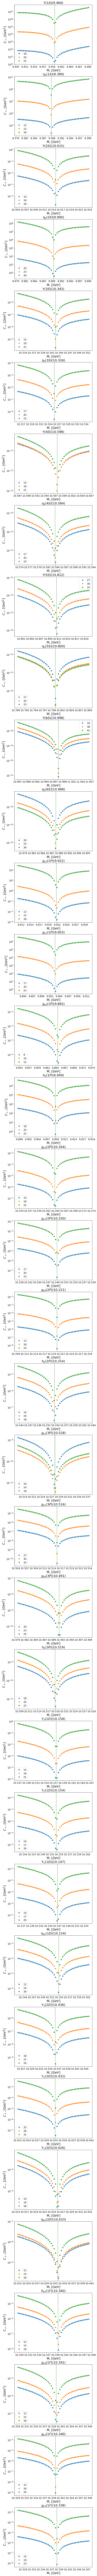

In [55]:
doPlots("b-scr", "scr")

In [58]:
printChecks("b-scr", "scr")

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
18                                                      1.21e-07
20                                                      2.96e-10
22                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
12                                                       1.3e-06
15                                                     -2.33e-10
18                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
14                                                      1.33e-10
16                                                     -1.63e-11
18                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
20                                                     -2.96e-08
23                                                      1.96e-10
26                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
15                                                     -4.66e-11
18                                                     -9.32e-12
21                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
17                                                     -5.12e-11
20                                                      2.33e-11
23                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
15                                                             0
18                                                             0
21                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
17                                                      -5.8e-12
20                                                       3.5e-12
23                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
27                                                             0
30                                                             0
33                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
17                                                             0
20                                                       2.3e-12
23                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
35                                                      -4.6e-12
38                                                       4.7e-12
41                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
20                                                      -4.6e-12
23                                                      -9.3e-12
26                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
13                                                        -2e-09
15                                                     -6.29e-11
18                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
17                                                      1.79e-08
20                                                      4.66e-11
23                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
8                                                       7.54e-09
10                                                      1.86e-11
12                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
18                                                     -2.72e-10
20                                                     -4.89e-11
22                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
14                                                     -4.82e-10
18                                                     -3.49e-11
22                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
17                                                      1.33e-10
20                                                     -1.63e-11
23                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
13                                                     -1.48e-09
18                                                     -2.91e-10
23                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
14                                                      4.66e-12
16                                                      4.66e-12
18                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
10                                                       1.1e-05
14                                                             0
18                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
27                                                     -3.35e-10
30                                                     -3.73e-11
33                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
20                                                     -1.98e-11
23                                                     -1.16e-12
25                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
18                                                       4.7e-12
20                                                       4.7e-12
22                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
15                                                      9.78e-10
18                                                      9.31e-12
21                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
14                                                      6.12e-10
17                                                      -2.1e-11
20                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
14                                                      4.98e-10
17                                                      5.12e-11
20                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
12                                                     -3.72e-11
14                                                     -9.31e-12
16                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
18                                                      3.03e-11
21                                                      1.16e-11
24                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
25                                                      3.31e-10
28                                                      3.26e-11
31                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
14                                                      2.33e-12
16                                                     -2.32e-12
18                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
12                                                      4.84e-10
15                                                     -4.66e-12
18                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
12                                                     -4.65e-12
15                                                     -4.65e-12
18                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
12                                                      1.05e-11
15                                                     -8.15e-12
18                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
12                                                      6.29e-11
16                                                      6.99e-12
20                                                             0

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
15                                                     -4.21e-10
19                                                      2.56e-11
23                                                             0

In [59]:
article = pd.read_csv("../data/b-spectrum.csv", index_col=0, comment="#")
res = article.join(readMine("b-scr", "scr"))

In [60]:
compiled = res.join(\
    res["SP"].subtract(res["my(scr)"], axis=0).abs().rename("dev(scr)")\
).join(\
    res.subtract(res["my(scr)"], axis=0).abs().drop(["my(scr)"], axis=1).min(axis=1).rename("alldev(scr)")\
)\
.round({"dev(scr)": 3, "alldev(scr)": 3})

compiled = compiled[["PDG", "SNR", "GI", "NR", "SP", "my(scr)", "dev(scr)", "alldev(scr)"]]

In [61]:
compiled

PDG      SNR     GI       NR     SP  my(scr)  dev(scr)  \
name                                                                    
yps_1S    9.46e+03 9.46e+03   9465  9.5e+03   9460 9.46e+03     0.171   
eta_b_1S   9.4e+03 9.39e+03   9402 9.46e+03   9390 9.39e+03     0.763   
yps_2S       1e+04    1e+04  10003    1e+04  10015    1e+04     0.453   
eta_b_2S     1e+04 9.99e+03   9976 9.99e+03   9990 9.99e+03      0.13   
yps_3S    1.04e+04 1.04e+04  10354 1.03e+04  10343 1.03e+04     0.432   
eta_b_3S       nan 1.03e+04  10336 1.03e+04  10326 1.03e+04     0.077   
yps_4S    1.06e+04 1.06e+04  10635 1.06e+04  10597 1.06e+04      0.87   
eta_b_4S       nan 1.06e+04  10623      nan  10584 1.06e+04     0.281   
yps_5S    1.09e+04 1.08e+04  10878 1.08e+04  10811 1.08e+04     0.671   
eta_b_5S       nan 1.08e+04  10869      nan  10800 1.08e+04     0.364   
yps_6S     1.1e+04  1.1e+04  11102  1.1e+04  10997  1.1e+04      1.22   
eta_b_6S       nan  1.1e+04  11097      nan  10988  1.1e+04     0.494   
chi_b2_1P 9.91e+03 9.92e+03   9897 9.89e+03   9921 9.92e+03     0.654   
chi_b1_1P 9.89e+03  9.9e+03   9876 9.87e+03   9903  9.9e+03     0.278   
chi_b0_1P 9.86e+03 9.86e+03   9847 9.86e+03   9864 9.87e+03      1.03   
h_b_1P     9.9e+03  9.9e+03   9882 9.88e+03   9909 9.91e+03     0.375   
chi_b2_2P 1.03e+04 1.03e+04  10261 1.02e+04  10264 1.03e+04     0.217   
chi_b1_2P 1.03e+04 1.03e+04  10246 1.02e+04  10249 1.02e+04      0.82   
chi_b0_2P 1.02e+04 1.02e+04  10226 1.02e+04  10220 1.02e+04     0.831   
h_b_2P    1.03e+04 1.03e+04  10250 1.02e+04  10254 1.03e+04      0.13   
chi_b2_3P      nan 1.05e+04  10550 1.05e+04  10528 1.05e+04     0.239   
chi_b1_3P 1.05e+04 1.05e+04  10538 1.05e+04  10515 1.05e+04     0.805   
chi_b0_3P      nan 1.05e+04  10522 1.05e+04  10490 1.05e+04       1.4   
h_b_3P         nan 1.05e+04  10541 1.05e+04  10519 1.05e+04     0.293   
yps_3_1D       nan 1.02e+04  10155 1.01e+04  10157 1.02e+04     0.599   
yps_2_1D  1.02e+04 1.02e+04  10147 1.01e+04  10153 1.02e+04      0.62   
yps_1_1D       nan 1.01e+04  10138 1.01e+04  10146 1.01e+04     0.965   
eta_b2_1D      nan 1.02e+04  10148 1.01e+04  10153 1.02e+04      1.29   
yps_3_2D       nan 1.04e+04  10455 1.04e+04  10436 1.04e+04     0.337   
yps_2_2D       nan 1.04e+04  10449 1.04e+04  10432 1.04e+04     0.331   
yps_1_2D       nan 1.04e+04  10441 1.04e+04  10425 1.04e+04     0.989   
eta_b2_2D      nan 1.04e+04  10450 1.04e+04  10432 1.04e+04      1.06   
h_b3_1F        nan      nan  10355 1.03e+04  10339 1.03e+04      1.14   
chi_b4_1F      nan      nan  10358      nan  10340 1.03e+04     0.622   
chi_b3_1F      nan      nan  10355 1.03e+04  10340 1.03e+04     0.406   
chi_b2_1F      nan      nan  10350 1.03e+04  10338 1.03e+04     0.769   

           alldev(scr)  
name                    
yps_1S           0.171  
eta_b_1S         0.237  
yps_2S           0.453  
eta_b_2S          0.13  
yps_3S           0.432  
eta_b_3S         0.077  
yps_4S            0.87  
eta_b_4S         0.281  
yps_5S           0.671  
eta_b_5S         0.364  
yps_6S            1.22  
eta_b_6S         0.494  
chi_b2_1P        0.654  
chi_b1_1P        0.278  
chi_b0_1P        0.026  
h_b_1P           0.375  
chi_b2_2P        0.217  
chi_b1_2P         0.82  
chi_b0_2P        0.169  
h_b_2P            0.13  
chi_b2_3P        0.239  
chi_b1_3P        0.805  
chi_b0_3P          1.4  
h_b_3P           0.293  
yps_3_1D         0.599  
yps_2_1D          0.62  
yps_1_1D         0.965  
eta_b2_1D         1.29  
yps_3_2D         0.337  
yps_2_2D         0.331  
yps_1_2D         0.989  
eta_b2_2D         1.06  
h_b3_1F           1.14  
chi_b4_1F        0.622  
chi_b3_1F        0.406  
chi_b2_1F        0.769

## description of columns
* my(scr) - my results for screened potential
* dev(scr) - deviation of my results from those represented in paper
* alldev(scr) - minimum among deviations from: PDG, SNR, GI, NR, SP; columns shown in the article

In [62]:
compiled.sort_values("alldev(scr)")

PDG      SNR     GI       NR     SP  my(scr)  dev(scr)  \
name                                                                    
chi_b0_1P 9.86e+03 9.86e+03   9847 9.86e+03   9864 9.87e+03      1.03   
eta_b_3S       nan 1.03e+04  10336 1.03e+04  10326 1.03e+04     0.077   
h_b_2P    1.03e+04 1.03e+04  10250 1.02e+04  10254 1.03e+04      0.13   
eta_b_2S     1e+04 9.99e+03   9976 9.99e+03   9990 9.99e+03      0.13   
chi_b0_2P 1.02e+04 1.02e+04  10226 1.02e+04  10220 1.02e+04     0.831   
yps_1S    9.46e+03 9.46e+03   9465  9.5e+03   9460 9.46e+03     0.171   
chi_b2_2P 1.03e+04 1.03e+04  10261 1.02e+04  10264 1.03e+04     0.217   
eta_b_1S   9.4e+03 9.39e+03   9402 9.46e+03   9390 9.39e+03     0.763   
chi_b2_3P      nan 1.05e+04  10550 1.05e+04  10528 1.05e+04     0.239   
chi_b1_1P 9.89e+03  9.9e+03   9876 9.87e+03   9903  9.9e+03     0.278   
eta_b_4S       nan 1.06e+04  10623      nan  10584 1.06e+04     0.281   
h_b_3P         nan 1.05e+04  10541 1.05e+04  10519 1.05e+04     0.293   
yps_2_2D       nan 1.04e+04  10449 1.04e+04  10432 1.04e+04     0.331   
yps_3_2D       nan 1.04e+04  10455 1.04e+04  10436 1.04e+04     0.337   
eta_b_5S       nan 1.08e+04  10869      nan  10800 1.08e+04     0.364   
h_b_1P     9.9e+03  9.9e+03   9882 9.88e+03   9909 9.91e+03     0.375   
chi_b3_1F      nan      nan  10355 1.03e+04  10340 1.03e+04     0.406   
yps_3S    1.04e+04 1.04e+04  10354 1.03e+04  10343 1.03e+04     0.432   
yps_2S       1e+04    1e+04  10003    1e+04  10015    1e+04     0.453   
eta_b_6S       nan  1.1e+04  11097      nan  10988  1.1e+04     0.494   
yps_3_1D       nan 1.02e+04  10155 1.01e+04  10157 1.02e+04     0.599   
yps_2_1D  1.02e+04 1.02e+04  10147 1.01e+04  10153 1.02e+04      0.62   
chi_b4_1F      nan      nan  10358      nan  10340 1.03e+04     0.622   
chi_b2_1P 9.91e+03 9.92e+03   9897 9.89e+03   9921 9.92e+03     0.654   
yps_5S    1.09e+04 1.08e+04  10878 1.08e+04  10811 1.08e+04     0.671   
chi_b2_1F      nan      nan  10350 1.03e+04  10338 1.03e+04     0.769   
chi_b1_3P 1.05e+04 1.05e+04  10538 1.05e+04  10515 1.05e+04     0.805   
chi_b1_2P 1.03e+04 1.03e+04  10246 1.02e+04  10249 1.02e+04      0.82   
yps_4S    1.06e+04 1.06e+04  10635 1.06e+04  10597 1.06e+04      0.87   
yps_1_1D       nan 1.01e+04  10138 1.01e+04  10146 1.01e+04     0.965   
yps_1_2D       nan 1.04e+04  10441 1.04e+04  10425 1.04e+04     0.989   
eta_b2_2D      nan 1.04e+04  10450 1.04e+04  10432 1.04e+04      1.06   
h_b3_1F        nan      nan  10355 1.03e+04  10339 1.03e+04      1.14   
yps_6S     1.1e+04  1.1e+04  11102  1.1e+04  10997  1.1e+04      1.22   
eta_b2_1D      nan 1.02e+04  10148 1.01e+04  10153 1.02e+04      1.29   
chi_b0_3P      nan 1.05e+04  10522 1.05e+04  10490 1.05e+04       1.4   

           alldev(scr)  
name                    
chi_b0_1P        0.026  
eta_b_3S         0.077  
h_b_2P            0.13  
eta_b_2S          0.13  
chi_b0_2P        0.169  
yps_1S           0.171  
chi_b2_2P        0.217  
eta_b_1S         0.237  
chi_b2_3P        0.239  
chi_b1_1P        0.278  
eta_b_4S         0.281  
h_b_3P           0.293  
yps_2_2D         0.331  
yps_3_2D         0.337  
eta_b_5S         0.364  
h_b_1P           0.375  
chi_b3_1F        0.406  
yps_3S           0.432  
yps_2S           0.453  
eta_b_6S         0.494  
yps_3_1D         0.599  
yps_2_1D          0.62  
chi_b4_1F        0.622  
chi_b2_1P        0.654  
yps_5S           0.671  
chi_b2_1F        0.769  
chi_b1_3P        0.805  
chi_b1_2P         0.82  
yps_4S            0.87  
yps_1_1D         0.965  
yps_1_2D         0.989  
eta_b2_2D         1.06  
h_b3_1F           1.14  
yps_6S            1.22  
eta_b2_1D         1.29  
chi_b0_3P          1.4

# Output for thesis

## Dip for $\chi_{b0}(1P)$

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
8                                                       7.54e-09
10                                                      1.86e-11
12                                                             0

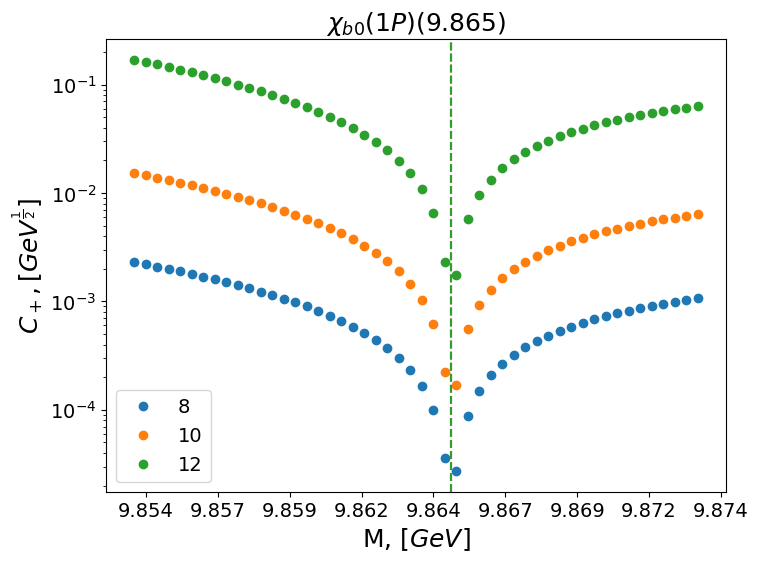

In [63]:
plotParticle(plt.gca(), "chi_b0_1P", "b-scr", "scr")
plt.savefig("export/chi_b0_1P-dip.eps")
with open("export/chi_b0_1P-dipcheck.tex", "w") as f:
    display(printCheck("chi_b0_1P", "b-scr", "scr"))
    f.write(printCheck("chi_b0_1P", "b-scr", "scr").to_latex(escape=False, column_format="lc"))

## Dip for $\chi_{c0}(1P)$

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                             0
40                                                             0
43                                                             0

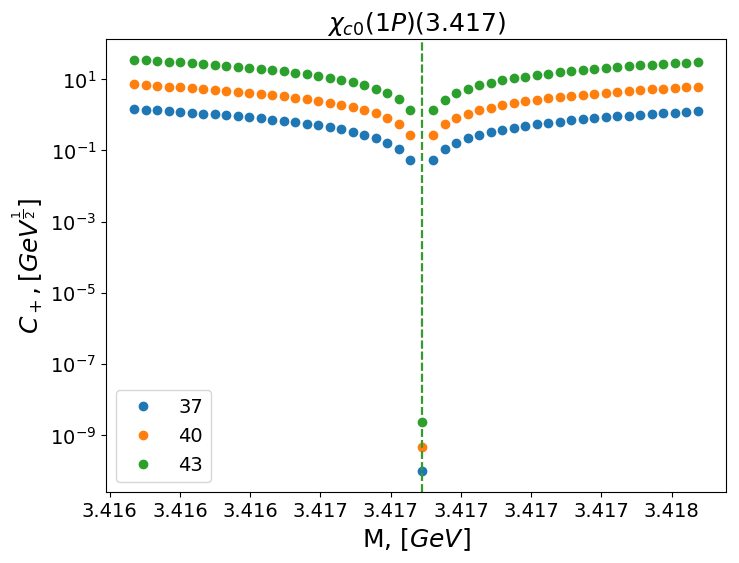

In [64]:
plotParticle(plt.gca(), "chi_c0_1P", "c-scr", "scr")
plt.savefig("export/chi_c0_1P-dip.eps")
with open("export/chi_c0_1P-dipcheck.tex", "w") as f:
    display(printCheck("chi_c0_1P", "c-scr", "scr"))
    f.write(printCheck("chi_c0_1P", "c-scr", "scr").to_latex(escape=False, column_format="lc"))

## Dip for $\chi_{c0}(1P)$ in linear potential

Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$]                                           
37                                                       1.8e-13
40                                                       1.8e-13
43                                                             0

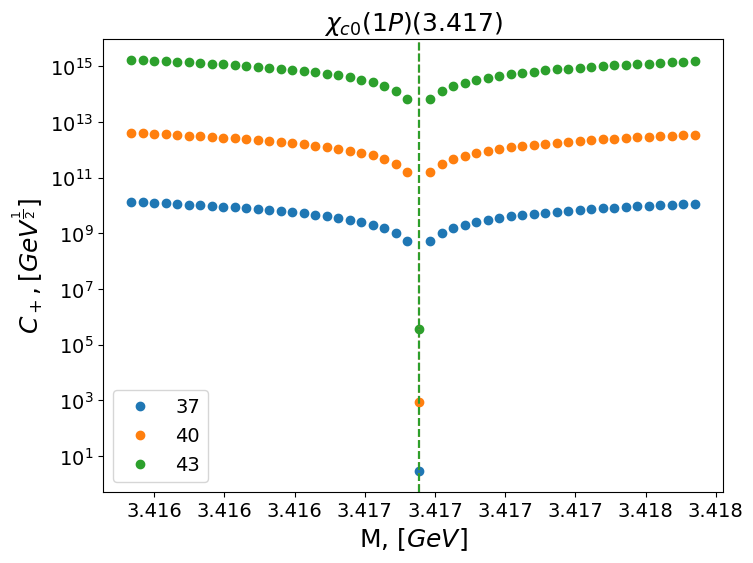

In [65]:
plotParticle(plt.gca(), "chi_c0_1P", "c-lin", "lin")
plt.savefig("export/chi_c0_1P-lin-dip.eps")
with open("export/chi_c0_1P-lin-dipcheck.tex", "w") as f:
    display(printCheck("chi_c0_1P", "c-lin", "lin"))
    f.write(printCheck("chi_c0_1P", "c-lin", "lin").to_latex(escape=False, column_format="lc"))

## Bottomonium Spectrum. Screened

In [76]:
compiled = pd.read_csv("../data/b-spectrum.csv", index_col=0, comment="#")
compiled = compiled.join(readMine("b-scr", "scr"))[["PDG", "SP", "my(scr)"]]
compiled.columns = ["PDG", "Deng", "Our"]
compiled.index = compiled.index.map(lambda s: "$"+code2name(s)+"$")
compiled.index.name = "States"
compiled = compiled.round({"PDG": 0, 'Our': 2})
print("Our std: {}".format(compiled["PDG"].subtract(compiled["Our"]).std()))
print("Deng std: {}".format(compiled["PDG"].subtract(compiled["Deng"]).std()))
compiled['PDG'] = compiled['PDG'].map(lambda num: '{:g}'.format(num) if not np.isnan(num) else "—")
display(compiled)

with open("export/bot-spectr.tex", "w") as f:
    f.write(compiled.to_latex(escape=False, column_format="lccc", na_rep="—"))

Our std: 20.29070875461741
Deng std: 20.25717011767613


PDG   Deng      Our
States                                   
$\Upsilon(1S)$       9460   9460 9.46e+03
$\eta_{b}(1S)$       9398   9390 9.39e+03
$\Upsilon(2S)$      10023  10015    1e+04
$\eta_{b}(2S)$       9999   9990 9.99e+03
$\Upsilon(3S)$      10355  10343 1.03e+04
$\eta_{b}(3S)$          —  10326 1.03e+04
$\Upsilon(4S)$      10579  10597 1.06e+04
$\eta_{b}(4S)$          —  10584 1.06e+04
$\Upsilon(5S)$      10889  10811 1.08e+04
$\eta_{b}(5S)$          —  10800 1.08e+04
$\Upsilon(6S)$      10992  10997  1.1e+04
$\eta_{b}(6S)$          —  10988  1.1e+04
$\chi_{b2}(1P)$      9912   9921 9.92e+03
$\chi_{b1}(1P)$      9893   9903  9.9e+03
$\chi_{b0}(1P)$      9859   9864 9.87e+03
$h_{b}(1P)$          9899   9909 9.91e+03
$\chi_{b2}(2P)$     10269  10264 1.03e+04
$\chi_{b1}(2P)$     10255  10249 1.02e+04
$\chi_{b0}(2P)$     10233  10220 1.02e+04
$h_{b}(2P)$         10260  10254 1.03e+04
$\chi_{b2}(3P)$         —  10528 1.05e+04
$\chi_{b1}(3P)$     10512  10515 1.05e+04
$\chi_{b0}(3P)$         —  10490 1.05e+04
$h_{b}(3P)$             —  10519 1.05e+04
$\Upsilon_{3}(1D)$      —  10157 1.02e+04
$\Upsilon_{2}(1D)$  10164  10153 1.02e+04
$\Upsilon_{1}(1D)$      —  10146 1.01e+04
$\eta_{b2}(1D)$         —  10153 1.02e+04
$\Upsilon_{3}(2D)$      —  10436 1.04e+04
$\Upsilon_{2}(2D)$      —  10432 1.04e+04
$\Upsilon_{1}(2D)$      —  10425 1.04e+04
$\eta_{b2}(2D)$         —  10432 1.04e+04
$h_{b3}(1F)$            —  10339 1.03e+04
$\chi_{b4}(1F)$         —  10340 1.03e+04
$\chi_{b3}(1F)$         —  10340 1.03e+04
$\chi_{b2}(1F)$         —  10338 1.03e+04

## Charmonium spectrum. Screened

In [71]:
compiled = pd.read_csv("../data/c-spectrum.csv", index_col=0, comment="#")
compiled = compiled.join(readMine("c-scr", "scr"))[["PDG", "SP", "my(scr)"]]
compiled.columns = ["PDG", "Deng", "Our"]
compiled.index = compiled.index.map(lambda s: "$"+code2name(s)+"$")
compiled.index.name = "States"
compiled = compiled.round({"PDG": 0, 'Our': 2})
print("Our std: {}".format(compiled["PDG"].subtract(compiled["Our"]).std()))
print("Deng std: {}".format(compiled["PDG"].subtract(compiled["Deng"]).std()))
compiled['PDG'] = compiled['PDG'].map(lambda num: '{:g}'.format(num) if not np.isnan(num) else "—")
display(compiled)

with open("export/charm-spectr.tex", "w") as f:
    f.write(compiled.to_latex(escape=False, column_format="lccc", na_rep="—"))

Our std: 43.64861995309265
Deng std: 43.725115371897125


PDG  Deng      Our
States                              
$\psi(1S)$       3097  3097  3.1e+03
$\eta_{c}(1S)$   2984  2984 2.98e+03
$\psi(2S)$       3686  3679 3.68e+03
$\eta_{c}(2S)$   3639  3637 3.64e+03
$\psi(3S)$       4040  4030 4.03e+03
$\eta_{c}(3S)$      —  4004    4e+03
$\psi(4S)$       4415  4281 4.28e+03
$\eta_{c}(4S)$      —  4264 4.26e+03
$\psi(5S)$          —  4472 4.47e+03
$\eta_{c}(5S)$      —  4459 4.46e+03
$\chi_{c2}(1P)$  3556  3553 3.55e+03
$\chi_{c1}(1P)$  3511  3521 3.52e+03
$\chi_{c0}(1P)$  3415  3415 3.42e+03
$h_{c}(1P)$      3525  3526 3.53e+03
$\chi_{c2}(2P)$  3927  3937 3.94e+03
$\chi_{c1}(2P)$     —  3914 3.91e+03
$\chi_{c0}(2P)$  3918  3848 3.85e+03
$h_{c}(2P)$         —  3916 3.92e+03
$\chi_{c2}(3P)$     —  4211 4.21e+03
$\chi_{c1}(3P)$     —  4192 4.19e+03
$\chi_{c0}(3P)$     —  4146 4.15e+03
$h_{c}(3P)$         —  4193 4.19e+03
$\psi_{3}(1D)$      —  3808 3.81e+03
$\psi_{2}(1D)$   3823  3807 3.81e+03
$\psi_{1}(1D)$   3778  3792 3.79e+03
$\eta_{c2}(1D)$     —  3805 3.81e+03
$\psi_{3}(2D)$      —  4112 4.11e+03
$\psi_{2}(2D)$      —  4109 4.11e+03
$\psi_{1}(2D)$   4191  4095  4.1e+03
$\eta_{c2}(2D)$     —  4108 4.11e+03
$\psi_{3}(3D)$      —  4340 4.34e+03
$\psi_{2}(3D)$      —  4337 4.34e+03
$\psi_{1}(3D)$      —  4324 4.32e+03
$\eta_{c2}(3D)$     —  4336 4.34e+03

## Charmonium spectrum. Linear

In [74]:
compiled = pd.read_csv("../data/c-spectrum.csv", index_col=0, comment="#")
compiled = compiled.join(readMine("c-lin", "lin"))[["PDG", "LP", "my(lin)"]]
compiled.columns = ["PDG", "Deng", "Our"]
compiled.index = compiled.index.map(lambda s: "$"+code2name(s)+"$")
compiled.index.name = "States"
compiled = compiled.round({"PDG": 0, 'Our': 2})
print("Our std: {}".format(compiled["PDG"].subtract(compiled["Our"]).std()))
print("Deng std: {}".format(compiled["PDG"].subtract(compiled["Deng"]).std()))
compiled['PDG'] = compiled['PDG'].map(lambda num: '{:g}'.format(num) if not np.isnan(num) else "—")
display(compiled)

with open("export/charm-spectr-lin.tex", "w") as f:
    f.write(compiled.to_latex(escape=False, column_format="lccc", na_rep="—"))

Our std: 23.77136833211232
Deng std: 23.902181609934388


PDG  Deng      Our
States                              
$\psi(1S)$       3097  3097  3.1e+03
$\eta_{c}(1S)$   2984  2983 2.98e+03
$\psi(2S)$       3686  3679 3.68e+03
$\eta_{c}(2S)$   3639  3635 3.63e+03
$\psi(3S)$       4040  4078 4.08e+03
$\eta_{c}(3S)$      —  4048 4.05e+03
$\psi(4S)$       4415  4412 4.41e+03
$\eta_{c}(4S)$      —  4388 4.39e+03
$\psi(5S)$          —  4711 4.71e+03
$\eta_{c}(5S)$      —  4690 4.69e+03
$\chi_{c2}(1P)$  3556  3552 3.55e+03
$\chi_{c1}(1P)$  3511  3516 3.52e+03
$\chi_{c0}(1P)$  3415  3415 3.42e+03
$h_{c}(1P)$      3525  3522 3.52e+03
$\chi_{c2}(2P)$  3927  3967 3.97e+03
$\chi_{c1}(2P)$     —  3937 3.94e+03
$\chi_{c0}(2P)$  3918  3869 3.87e+03
$h_{c}(2P)$         —  3940 3.94e+03
$\chi_{c2}(3P)$     —  4310 4.31e+03
$\chi_{c1}(3P)$     —  4284 4.28e+03
$\chi_{c0}(3P)$     —  4230 4.23e+03
$h_{c}(3P)$         —  4285 4.29e+03
$\psi_{3}(1D)$      —  3811 3.81e+03
$\psi_{2}(1D)$   3823  3807 3.81e+03
$\psi_{1}(1D)$   3778  3787 3.79e+03
$\eta_{c2}(1D)$     —  3806 3.81e+03
$\psi_{3}(2D)$      —  4172 4.17e+03
$\psi_{2}(2D)$      —  4165 4.16e+03
$\psi_{1}(2D)$   4191  4144 4.14e+03
$\eta_{c2}(2D)$     —  4164 4.16e+03
$\psi_{3}(3D)$      —  4486 4.49e+03
$\psi_{2}(3D)$      —  4478 4.48e+03
$\psi_{1}(3D)$      —  4456 4.46e+03
$\eta_{c2}(3D)$     —  4478 4.48e+03